In [1]:
import sys
import numpy as np

sys.path.append('/home/pierre/scVI/ppc')

from synthetic_data import Mixed75Dataset, SyntheticDataset
from metrics import SummaryStatsMetric
from scvi.inference.inference import UnsupervisedTrainer
from scvi.models import VAE
from scvi.dataset.synthetic import SyntheticRandomDataset
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import wilcoxon

sns.set()

/home/pierre/miniconda3/envs/scvi/lib/python3.6/site-packages/scikit_learn-0.19.2-py3.6-linux-x86_64.egg/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
nb_cells = 2000

In [5]:
nb_genes = 500
# my_dataset = SyntheticDataset(batch_size=1000, nb_genes=nb_genes, n_batches=2, n_labels=3, mode='nb',
#                               ratio_genes_zi=0.75)
my_dataset = SyntheticRandomDataset(dropout=0.01)
use_batches = True
use_cuda = True
verbose = False
n_epochs = 250
lr = 1e-4
early_stopping_kwargs = {
                       'early_stopping_metric': 'll',
                       # 'save_best_state_metric': 'll',
                       'patience': 15,
                       'threshold': 3}

mu 4.0 theta 2.0 r 2.0 p 0.6666666666666666 dropout 0.01
File data/random_metadata.pickle already downloaded


IndexError: index 1897 is out of bounds for axis 0 with size 1897

In [40]:
vae = VAE(my_dataset.nb_genes, n_batch=my_dataset.n_batches * use_batches, dropout_rate=0.2,
                 reconstruction_loss='zinb')
trainer = UnsupervisedTrainer(vae,
                                    my_dataset,
                                    train_size=0.8,
                                    use_cuda=use_cuda,
                                    kl=1, verbose=verbose, frequency=1,
                                    early_stopping_kwargs=early_stopping_kwargs)
trainer.train(n_epochs=n_epochs, lr=lr, eps=0.01)
res_zi = SummaryStatsMetric(trainer=trainer, phi_name='dropout', stat_name='tstat').compute()

training:  56%|█████▌    | 140/250 [00:22<00:17,  6.39it/s]
Stopping early: no improvement of more than 3 nats in 15 epochs
If the early stopping criterion is too strong, please instantiate it with different parameters in the train method.
training:  56%|█████▋    | 141/250 [00:22<00:17,  6.15it/s]


In [ ]:
vae = VAE(my_dataset.nb_genes, n_batch=my_dataset.n_batches * use_batches, dropout_rate=0.2,
                 reconstruction_loss='nb')
trainer = UnsupervisedTrainer(vae,
                                    my_dataset,
                                    train_size=0.8,
                                    use_cuda=use_cuda,
                                    kl=1, verbose=verbose, frequency=1,
                                    early_stopping_kwargs=early_stopping_kwargs)
trainer.train(n_epochs=n_epochs, lr=lr, eps=0.01)
res_nb = SummaryStatsMetric(trainer=trainer, phi_name='dropout', stat_name='tstat').compute()

training:  74%|███████▎  | 184/250 [00:27<00:09,  6.68it/s]

In [35]:
phi_nb_gen_gene = res_nb['_phi_gen_gene']
phi_zi_gen_gene = res_zi['_phi_gen_gene']
phi_real_gene = res_nb['_phi_real_gene']
assert (res_nb['_phi_real_gene'] == res_zi['_phi_real_gene']).all()

In [37]:
phi_real_gene

array([0.001875, 0.00125 , 0.0025  , 0.00375 , 0.0025  , 0.004375,
       0.003125, 0.0025  , 0.00125 , 0.001875, 0.0025  , 0.003125,
       0.00125 , 0.003125, 0.0025  , 0.001875, 0.005   , 0.003125,
       0.003125, 0.000625, 0.001875, 0.      , 0.000625, 0.005625,
       0.000625, 0.000625, 0.004375, 0.00125 , 0.00125 , 0.0025  ,
       0.0025  , 0.00125 , 0.00125 , 0.004375, 0.001875, 0.0025  ,
       0.00375 , 0.001875, 0.00375 , 0.0025  , 0.003125, 0.00125 ,
       0.00125 , 0.0025  , 0.001875, 0.005625, 0.00125 , 0.005   ,
       0.005   , 0.001875, 0.005625, 0.00375 , 0.000625, 0.00375 ,
       0.00375 , 0.00375 , 0.003125, 0.005   , 0.00125 , 0.0025  ,
       0.0025  , 0.001875, 0.004375, 0.0025  , 0.001875, 0.004375,
       0.00375 , 0.003125, 0.003125, 0.0025  , 0.003125, 0.00125 ,
       0.0025  , 0.00375 , 0.003125, 0.003125, 0.003125, 0.001875,
       0.001875, 0.004375, 0.003125, 0.004375, 0.000625, 0.00125 ,
       0.001875, 0.003125, 0.00125 , 0.00125 , 0.0025  , 0.003

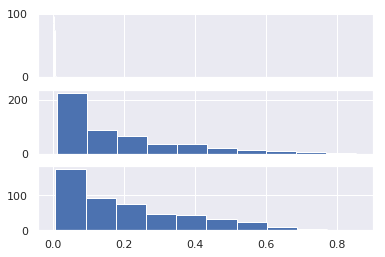

In [36]:
fig, axes = plt.subplots(nrows=3, sharex=True)
plt.sca(axes[0])
plt.hist(phi_real_gene)

plt.sca(axes[1])
plt.hist(phi_zi_gen_gene.mean(axis=-1))
# plt.hist(phi_zi_gen_gene[:, 5])


plt.sca(axes[2])
plt.hist(phi_nb_gen_gene.mean(axis=-1))
# plt.hist(phi_nb_gen_gene[:, 5])

plt.show()

In [10]:
phi_zi_gen_gene[]

array([[0.30125 , 0.284375, 0.2875  , ..., 0.271875, 0.29625 , 0.29625 ],
       [0.2825  , 0.30625 , 0.289375, ..., 0.29625 , 0.30375 , 0.28625 ],
       [0.29875 , 0.3175  , 0.325625, ..., 0.310625, 0.32125 , 0.325   ],
       ...,
       [0.746875, 0.715625, 0.7425  , ..., 0.736875, 0.726875, 0.701875],
       [0.29375 , 0.314375, 0.296875, ..., 0.274375, 0.301875, 0.304375],
       [0.3075  , 0.32    , 0.3125  , ..., 0.315625, 0.30375 , 0.29125 ]])

In [56]:
def wilcoxon_compute(ys):
    pvals = []
    zstats = []
    for gene_idx in range(nb_genes):
        z, pval = wilcoxon(ys[gene_idx, :])
        zstats.append(z)
        pvals.append(pval)
    return np.array(zstats), np.array(pvals)

se_zi = phi_zi_gen_gene.std(axis=-1) / np.sqrt(nb_cells)
se_nb = phi_nb_gen_gene.std(axis=-1) / np.sqrt(nb_cells)
t_zi = (phi_zi_gen_gene.mean(axis=-1) - phi_real_gene) / se_zi
t_nb = (phi_nb_gen_gene.mean(axis=-1) - phi_real_gene) / se_nb


# y_nb = phi_nb_gen_gene - phi_real_gene.reshape((-1, 1))
# y_zi = phi_zi_gen_gene - phi_real_gene.reshape((-1, 1))
# t_nb, _ = wilcoxon_compute(y_nb)
# t_zi, _ = wilcoxon_compute(y_zi)

In [57]:
se_zi.shape

(500,)

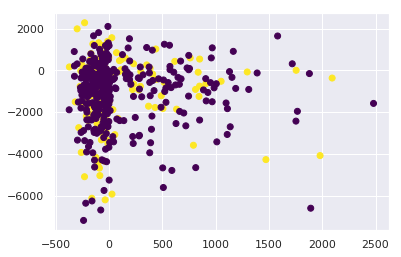

In [58]:
is_zi = np.zeros_like(t_zi,dtype=bool)
is_zi[:150] = True

plt.scatter(x=t_zi, y=t_nb, c=is_zi, cmap='viridis')
# plt.xscale('log')
# plt.yscale('log')
plt.show()

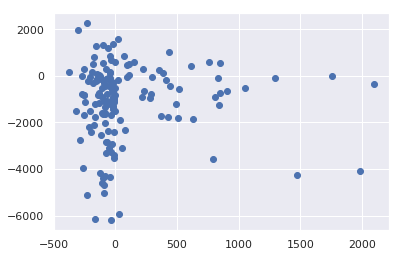

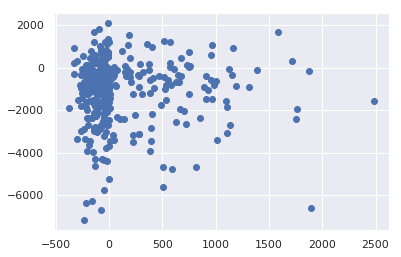

In [59]:
plt.scatter(x=t_zi[is_zi], y=t_nb[is_zi])
plt.show()

plt.scatter(x=t_zi[~is_zi], y=t_nb[~is_zi])
plt.show()